# Palmer Penguins
***

This notebook contains my analysis of the palmerpenguins data set. The palmer penguins data set contains data measurements for three different penguin species, the Chinstrap, Gentoo and Adélie penguin. The data was collected between 2007 - 2009 by Dr. Kristen Gorman with the [Palmer Station Long Term Ecological Research Program](https://lternet.edu/site/palmer-antarctica-lter/) on three different islands in the Palmer Archipelago, Antarctica. 

![The Palmer Penguins. Artwork by @allison_horst](https://sebastiancallh.github.io/ox-hugo/palmer-penguins.png)

The Palmer Penguins, artwork by @allison_horst






According to AllisonHorst.github.io "the goal of the palmerpenguins is to grovide a great datset for data exploration and visualization, as an alternative to iris". (https://github.com/allisonhorst/palmerpenguins/blob/main/README.md)

## Import Modules
***

Three different modules are required for this analysis:
* pandas
* numpy
* matplotlib.pyplot

Pandas is a python library for manipulating data and for performing data analysis. It can perform statistical calculations, find a correlations between two or more columns and it can be used to visualise data. The pandas package must first be loaded using the 'import' command to work with it. It is usually imported with the alias 'pd'. 

Numpy can perform a wide variety of mathematical calculations on arrays and matrices. All the elements in a numpy array should be of the same data type.

Matplotlib.pyplot is used to create plots

In [72]:
# Import pandas
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

## Importing the data set
***

The data set was imported as a csv file from [Seaborn Data](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). The original raw data set is available on Alison Horst's [GitHub](https://github.com/allisonhorst/palmerpenguins/blob/main/inst/extdata/penguins_raw.csv). The data set used has the advantage in that it has been processed to remove extraneous information such as any NA in the data and the year that data was collected. The other difference is that male and female are capitalised in the Seaborn data set. 

In [71]:
# Load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Overview of the data set and the variables it contains
***

There are a couple of commands that can be used to get an overview of the data set. 

The first one of these is simply, df. This will print out a few rows of the parsed csv from the start and the end of the dataframe. Another useful command is df.head(), which will by default print the first 5 rows of the data set. 

In [73]:
# Have a look. Prints out a few rows of the parsed csv file.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [74]:
# df.head() prints out the first five rows of the csv file.
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


We can see from the results that the dataset has 344 rows and seven columns. Each row gives the information that was collected for each individual penguin. For each penguin there are seven possible variables. The seven variables in the dataset are species, island, bill_length, bill depth, flipper length, the weight and the sex of each penguin studied.

## Suggest the datatypes that should be used to model the dataset



The info() method gives us more concise information about the dataframe. Like df and df.head() it tells us the the number and names of each column, but it also provides some additional information. It also tells us the data type of each column and the number of non-null entries in each variable. 

In [75]:
# Uniques variables in the island attribute
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [76]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [77]:
# df.info() gives concise information about the dataframe. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The data type (dtypes) of the species, island and sex attributes are object types. This is accurate as they are all strings. Species contains three different objects, which are the penguin species names, Adelie, Gentoo and Chinstrap. The names of the three islands are Biscoe, Dream and Torgersen. The sex of the penguins are either male or female. This variable had the highest no of null recorded where the sex of the penguin could not be identified. 

The bill length, bill depth and flipper length are all measured in mm with the data given to one decimal place. These are floating point number datatypes. The weight or body mass of the penguins is stated in grams is also given to one decimal place. 

In [78]:
# Describe the data set. Summary statistics about the data file. 
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [79]:
df.iloc[1]


species                 Adelie
island               Torgersen
bill_length_mm            39.5
bill_depth_mm             17.4
flipper_length_mm        186.0
body_mass_g             3800.0
sex                     FEMALE
Name: 1, dtype: object

## Create a bar chart of an appropriate variable
***

A bar chart can be used to examine the penguin population on each island. We know that there are three islands but what we don't know is 

## Penguin Population on Each Island. 

The following section will investigate the penguin populations on the three islands and which species were present on each island. 

### Name the islands.
To find out the names of the islands we can use the code:
* df["island"].unique(). 

The unique() function identifies the uniques names in the island column. 

### Penguin population on each island.

To count the penguin population on each island: df['island'].value_counts()

### Penguin species present on each island.

Uniques values in the species column. df.groupby('island')['species'].nunique()  
df.groupby('species')['island'].nunique()

To get a breakdown of the count of each penguin on each island either of the following two codes can be used:
* df.groupby('island')['species'].value_counts() 
* df.groupby('species')['island'].value_counts()

They both display the same information but they are grouped differently, the first groups by island, the second by species. 
 

In [80]:
# Penguin population on each island.
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

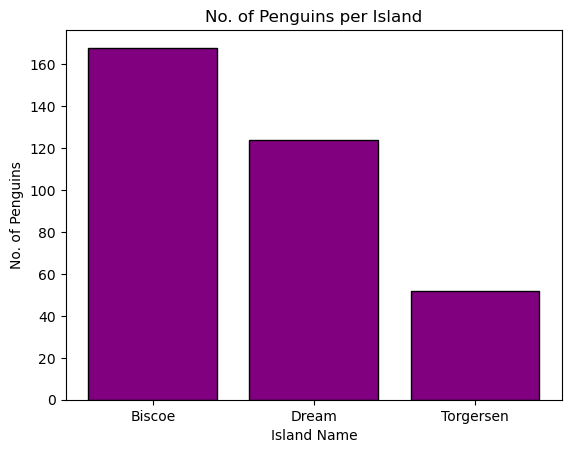

In [81]:
xpoints = np.array(["Biscoe", "Dream", "Torgersen"])
ypoints = np.array(df['island'].value_counts())

plt.bar(xpoints, ypoints, color = 'purple', edgecolor = "black")

plt.xlabel("Island Name")
plt.ylabel("No. of Penguins")
plt.title("No. of Penguins per Island")
plt.show

In [82]:
# Proportion of total penguin population on each island.

df['island'].value_counts('species')

island
Biscoe       0.488372
Dream        0.360465
Torgersen    0.151163
Name: proportion, dtype: float64

In [85]:
# Penguin species present per island.

df.groupby('island')['species'].nunique()


island
Biscoe       2
Dream        2
Torgersen    1
Name: species, dtype: int64

In [86]:
# A count of the different penguin species on each island.  

df.groupby('island')['species'].value_counts()


island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: count, dtype: int64

## Histogram of an appropriate variable

An appropriate variable to use to make a histogram could be the flipper length.

Text(0.5, 1.0, 'Variations in penguin flipper length')

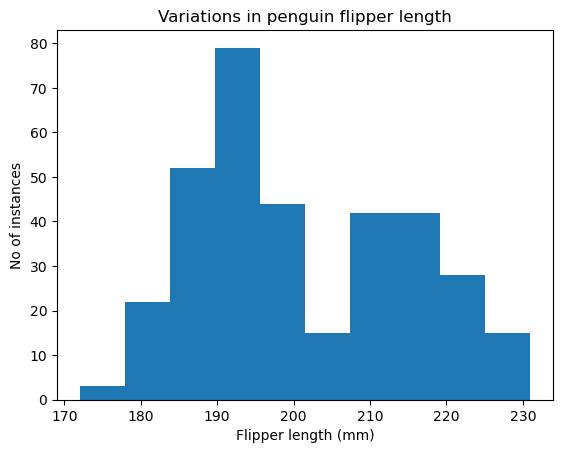

In [87]:
plt.hist(np.array(df["flipper_length_mm"]))
plt.xlabel("Flipper length (mm)")
plt.ylabel("No of instances")
plt.title("Variations in penguin flipper length")

In [97]:

df.groupby("species")["flipper_length_mm"].agg([np.mean, np.std, np.median])

,mean,std,median
species,,,
Adelie,189.953642,6.539457,190.0
Chinstrap,195.823529,7.131894,196.0
Gentoo,217.186992,6.484976,216.0


In [98]:
# Same as above but using pivot_table

df.pivot_table(values = "flipper_length_mm", index = "species", aggfunc=[np.mean, np.std, np.median])

,mean,std,median
,flipper_length_mm,flipper_length_mm,flipper_length_mm
species,,,
Adelie,189.953642,6.539457,190.0
Chinstrap,195.823529,7.131894,196.0
Gentoo,217.186992,6.484976,216.0


In [100]:
species_index = df.set_index("species")
species_index.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [118]:
flipper_length = species_index["flipper_length_mm"]
flipper_length.head()

species
Adelie    181.0
Adelie    186.0
Adelie    195.0
Adelie      NaN
Adelie    193.0
Name: flipper_length_mm, dtype: float64

In [119]:
adelie_flipper = flipper_length.loc[["Adelie"]]
chinstrap_flipper = flipper_length.loc[["Chinstrap"]]
gentoo_flipper = flipper_length.loc[["Gentoo"]]

Text(0.5, 1.0, 'Variations in penguin flipper length')

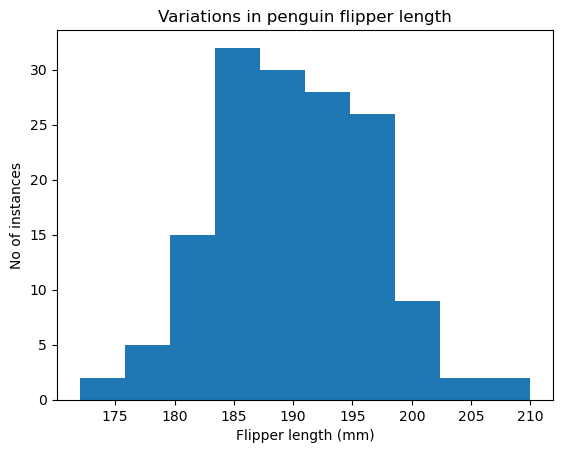

In [117]:
plt.hist(np.array(adelie_flipper))
plt.xlabel("Flipper length (mm)")
plt.ylabel("No of instances")
plt.title("Variations in Adelie penguin flipper length")

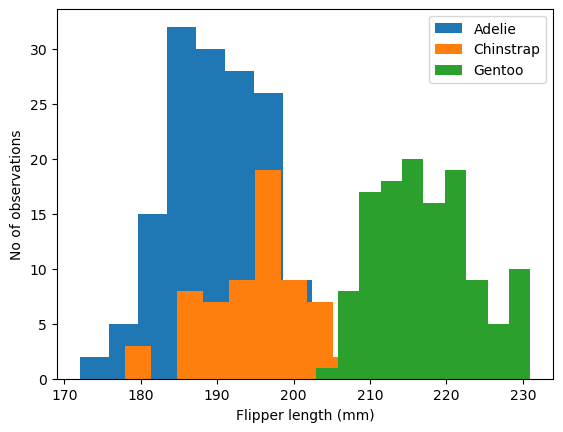

In [122]:
fig, ax = plt.subplots()
ax.hist(adelie_flipper, label = "Adelie")
ax.hist(chinstrap_flipper, label = "Chinstrap")
ax.hist(gentoo_flipper, label = "Gentoo")
ax.set_xlabel("Flipper length (mm)")
ax.set_ylabel("No of observations")
ax.legend()
plt.show()

Graph of species per Island Nice plot required here to show the breakdown of penguins on each island. Stacked bar chart with a different colour for each penguin species.

y1 is gentoo and adelie on biscoe
y2 = chinstrap and adelie on dream
y3 = adelie on torgersen

In [88]:
xpoints = ["Biscoe", "Dream", "Torgersen"]
y1 = np.array(df.groupby('island' = "Biscoe")['species'].value_counts())
y2 = np.array(df.groupby('island' = "Dream")['species'].value_counts())
y3 = np.array(df.groupby('island' = "Torgersen")['species'].value_counts())

plt.bar(xpoints, y1, color = 'r')
plt.bar(xpoints, y2, color = 'r')
plt.bar(xpoints, y1, color = 'r')
plt.bar(xpoints, y1, color = 'r')



SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2556184786.py, line 2)

In [89]:
# The number of penguin species per island. 

df.groupby('species')['island'].nunique()


species
Adelie       3
Chinstrap    1
Gentoo       1
Name: island, dtype: int64

In [90]:
df.groupby('species')['island'].value_counts()


species    island   
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
Chinstrap  Dream         68
Gentoo     Biscoe       124
Name: count, dtype: int64

Nice plot required here to show the breakdown of penguins on each island. Stacked bar chart with a different colour for each penguin species.


### Summary of the penguin population on each island. 

The three islands are Biscoe, Dream and Torgersen. Biscoe is the most populous island with 168 penguins or 48.8% of the penguin population. Torgersen is the least populous island with only 52 penguins (or 15.1%) of the penguins studied. 

Both Biscoe and Dream have two penguin species, with only one penguin species present on Torgersen. Adelie penguins were found on all three islands. With Chinstrap and Gentoo found on Dream and Torgersen respectively.

** Investigating the Penguin Species.

In [91]:
df.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


In [92]:
df.groupby('island')['body_mass_g'].mean()


island
Biscoe       4716.017964
Dream        3712.903226
Torgersen    3706.372549
Name: body_mass_g, dtype: float64

In [93]:
df.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [94]:
# Number and sex of penguins
df["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [95]:
# Are male penguins heavier than female penguins?

df.groupby('sex')['body_mass_g'].mean()

sex
FEMALE    3862.272727
MALE      4545.684524
Name: body_mass_g, dtype: float64

In [ ]:
# Look at the first row
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [ ]:
df.groupby('species')['flipper_length_mm'].mean()


species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

In [96]:
df.groupby("species").agg({"flipper_length_mm": 'mean', 'bill_length_mm' : 'mean', 'body_mass_g' : 'mean'})



,flipper_length_mm,bill_length_mm,body_mass_g
species,,,
Adelie,189.953642,38.791391,3700.662252
Chinstrap,195.823529,48.833824,3733.088235
Gentoo,217.186992,47.504878,5076.016260


In [ ]:
# Same as above but using pivot_table

df.pivot_table(values = "flipper_length_mm", index = "species", aggfunc=[np.mean, np.std, np.median])

,mean,std,median
,flipper_length_mm,flipper_length_mm,flipper_length_mm
species,,,
Adelie,189.953642,6.539457,190.0
Chinstrap,195.823529,7.131894,196.0
Gentoo,217.186992,6.484976,216.0


Do heavier penguins have longer flippers/bill length

Bigger bills, bigger body mass?

In [ ]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [ ]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single